# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np 
import seaborn as sb

### Load data

In [2]:
# Load the data file into a DataFrame
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
datetime_is_numeric=True
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [4]:
# print the general/summary information about the DataFrame

print(data.duplicated().sum())
data.describe(include='all', datetime_is_numeric=True)

0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [5]:
# print a sample of data

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


#### Missing values in:

- is_4wd 
- paint_color
- odometer
- cylinders 
- model_year




- date_posted type is object, should be DateTime
- model_year should be int

In [6]:
print(data.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [7]:
 data.isnull().sum()/len(data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

### Conclusions and further steps

- in is_4wd there are only 1 values, since this column's values are boolean, we can fill all NaN's with 0's
- odometer may have a connection with model_year and condition
- cylinders may have a connection with model and model_year
- paint_color is unpredictable, I will fill with 'unknown'


## Treat missing values (if any)


#### Dealing with missing vaules in paint_color


In [8]:
print(data['paint_color'].unique())
print()
data['paint_color'] = data['paint_color'].fillna('unknown') 
print(data['paint_color'].value_counts())

[nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64


##### paint_color conclusions

- Although we could fill these fields with the most common colors based on model, that information would still be misleading. Therefore, we will these missing values with 'unknown'.

#### Dealing with missing values in is_4wd

In [9]:
data.query('is_4wd == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [10]:
data['is_4wd'] = data['is_4wd'].fillna(0) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


##### is_4wd conlusions

- Since the data type in this column is boolean, it's safe to assume that the missing values mean that the car is not 4wd and therefore people left this blank. Therefore, we fill these values with 0's.

#### Dealing with missing values in model_year

In [11]:
data_without_missing_model_year = data.dropna(subset=['model_year']) 

model_year_medians = data_without_missing_model_year.groupby('model')['model_year'].median()
dict_model_year_medians=pd.Series(model_year_medians).to_dict()

data['model_year'] = data['model_year'].fillna(data.model.map(dict_model_year_medians))

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


#### Dealing with missing values in cylinders


In [12]:
print(data[data['cylinders'].isna()])


       price  model_year              model  condition  cylinders fuel  \
9       9200      2008.0        honda pilot  excellent        NaN  gas   
36     10499      2013.0       chrysler 300       good        NaN  gas   
37      7500      2005.0      toyota tacoma       good        NaN  gas   
59      5200      2006.0  toyota highlander       good        NaN  gas   
63     30000      1966.0       ford mustang  excellent        NaN  gas   
...      ...         ...                ...        ...        ...  ...   
51429   3250      2004.0       toyota camry       good        NaN  gas   
51442  28990      2018.0          ford f150  excellent        NaN  gas   
51460   5995      2007.0        ford fusion  excellent        NaN  gas   
51477   6499      2007.0           acura tl       good        NaN  gas   
51486   5895      2009.0   hyundai santa fe  excellent        NaN  gas   

       odometer transmission         type paint_color  is_4wd date_posted  \
9      147191.0    automatic      

In [13]:
data['cylinders'] = data['cylinders'].fillna(data.groupby(['model'])['cylinders'].transform('median'))
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [14]:
print(len(data[data['cylinders'].isna()]))
print(data[data['cylinders'].isna()])



0
Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


#### Dealing with missing values in odometer

In [15]:
print(data[data['odometer'].isna()])

       price  model_year                model  condition  cylinders fuel  \
3       1500      2003.0           ford f-150       fair        8.0  gas   
15     17990      2013.0             ram 1500  excellent        8.0  gas   
23      7500      2004.0        jeep wrangler       good        6.0  gas   
24      3950      2009.0         chrysler 200  excellent        4.0  gas   
25     11499      2017.0     chevrolet malibu   like new        4.0  gas   
...      ...         ...                  ...        ...        ...  ...   
51498  15900      2011.0      gmc sierra 1500  excellent        8.0  gas   
51507  29500      2012.0        toyota tundra       good        8.0  gas   
51516   8999      2011.0  jeep grand cherokee       good        6.0  gas   
51519  11750      2015.0         honda accord  excellent        4.0  gas   
51524   6300      2014.0        nissan altima       good        4.0  gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
3           NaN

In [16]:
data['odometer'] = data['odometer'].fillna(data.groupby(['condition','model_year'])['odometer'].transform('median'))
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51518 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [17]:
print(data[data['odometer'].isna()])


       price  model_year               model  condition  cylinders fuel  \
21421   4500      1974.0  chevrolet corvette       fair        8.0  gas   
28009  65000      1960.0  chevrolet corvette   like new        8.0  gas   
31806   1700      1996.0        ford mustang    salvage        6.0  gas   
33257   4500      1963.0    chevrolet impala       fair        6.0  gas   
33907  12995      1908.0   cadillac escalade  excellent        8.0  gas   
45694  18000      1929.0          ford f-150       good        8.0  gas   
46911  22300      2003.0  chevrolet corvette        new        8.0  gas   

       odometer transmission         type paint_color  is_4wd date_posted  \
21421       NaN    automatic        sedan         red     0.0  2018-12-15   
28009       NaN       manual        coupe     unknown     0.0  2018-11-03   
31806       NaN       manual  convertible       white     0.0  2019-03-31   
33257       NaN    automatic        sedan     unknown     0.0  2019-03-17   
33907       Na

##### odometer conclusion:

- The remaining missing values in odometer did not have enough data that matches model_year and condition to calculate medians and fill missing values

In [18]:
print(data.isna().sum())
print()
#To be better able to work with the data, I will get rid of the 33 rows with missing values.

data = data.dropna(subset=['odometer']) 
print(data.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        7
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


## Fix data types

[As the data is more or less complete now, fix the data types if required.]

In [19]:
print(data.head())
data['cylinders'] = data['cylinders'].astype('int')
data['odometer'] = data['odometer'].astype('int')
data['model_year'] = data['model_year'].astype('int')
data['is_4wd'] = data['is_4wd'].astype('int')
data['date_posted'] = pd.to_datetime(data['date_posted'], format= '%Y-%m-%d')

print(data.info())
print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500      2011.0      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas  193850.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV     unknown     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     0.0  2019-02-07           79  
3    automatic  pickup     unknown     0.0  2019-03-22            9  
4    automatic   sedan       black     0.0  2019-04-02           28  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51518 entries, 0 to 51524
Data columns (total 13 columns):
 #   Col

## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [20]:
# Add datetime values for when the ad was placed
data['day_posted']= pd.DatetimeIndex(data['date_posted']).day
data['month_posted']= pd.DatetimeIndex(data['date_posted']).month
data['year_posted']= pd.DatetimeIndex(data['date_posted']).year

print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500        2011      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    193850   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup     unknown       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

   day_posted  month_posted  year_posted  
0          23             6         2018  
1          19           

In [21]:
# Add the vehicle's age when the ad was placed
data['vehicle_age'] = data['year_posted'] - data['model_year'] + 1
print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500        2011      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    193850   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup     unknown       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

   day_posted  month_posted  year_posted  vehicle_age  
0          23             6         2018            8 

In [22]:
# Add the vehicle's average mileage per year

def calc_avg_yearly_mileage(row):
    odometer = row['odometer']
    vehicle_age = row['vehicle_age']
    return odometer/vehicle_age
         

data['avg_yearly_mileage'] = data.apply(calc_avg_yearly_mileage, axis=1)
data['avg_yearly_mileage'] = data['avg_yearly_mileage'].astype('int')

print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500        2011      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    193850   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup     unknown       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

   day_posted  month_posted  year_posted  vehicle_age  avg_yearly_mileage  
0          23             6       

## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [23]:
# print the general/summary information about the DataFrame

data.describe(include='all', datetime_is_numeric=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51518 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51518 non-null  int64         
 1   model_year          51518 non-null  int64         
 2   model               51518 non-null  object        
 3   condition           51518 non-null  object        
 4   cylinders           51518 non-null  int64         
 5   fuel                51518 non-null  object        
 6   odometer            51518 non-null  int64         
 7   transmission        51518 non-null  object        
 8   type                51518 non-null  object        
 9   paint_color         51518 non-null  object        
 10  is_4wd              51518 non-null  int64         
 11  date_posted         51518 non-null  datetime64[ns]
 12  days_listed         51518 non-null  int64         
 13  day_posted          51518 non-null  int64     

In [24]:
# print a sample of data
print(data.head(30))


    price  model_year                     model  condition  cylinders fuel  \
0    9400        2011                    bmw x5       good          6  gas   
1   25500        2011                ford f-150       good          6  gas   
2    5500        2013            hyundai sonata   like new          4  gas   
3    1500        2003                ford f-150       fair          8  gas   
4   14900        2017              chrysler 200  excellent          4  gas   
5   14990        2014              chrysler 300  excellent          6  gas   
6   12990        2015              toyota camry  excellent          4  gas   
7   15990        2013               honda pilot  excellent          6  gas   
8   11500        2012               kia sorento  excellent          4  gas   
9    9200        2008               honda pilot  excellent          6  gas   
10  19500        2011  chevrolet silverado 1500  excellent          8  gas   
11   8990        2012              honda accord  excellent      

## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [25]:
def distribution_IQR(column):
    print('Histogram of: {}'.format(column))
    data[column].hist(bins=100)
    plt.show

Histogram of: price


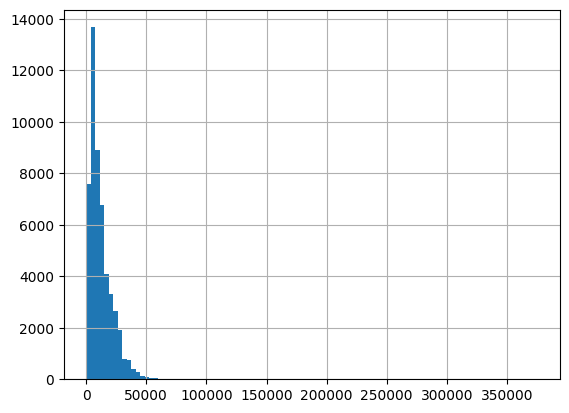

In [26]:
distribution_IQR('price')

Histogram of: vehicle_age


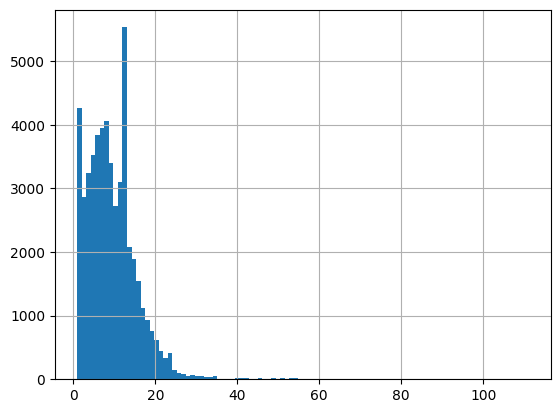

In [27]:
distribution_IQR('vehicle_age')

Histogram of: odometer


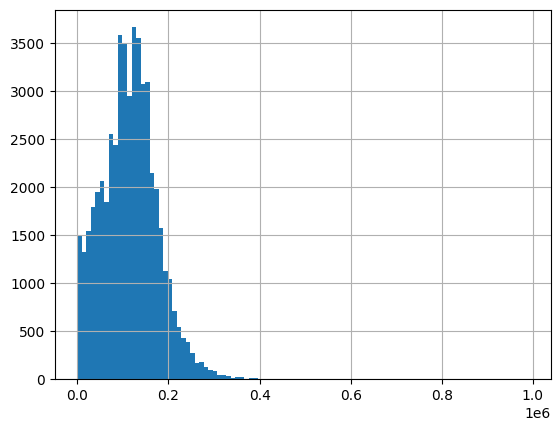

In [28]:
distribution_IQR('odometer')

- Odometer graph doesn't display x axis numbers in it's most readable form due to the outliers that are affecting our graph

Histogram of: cylinders


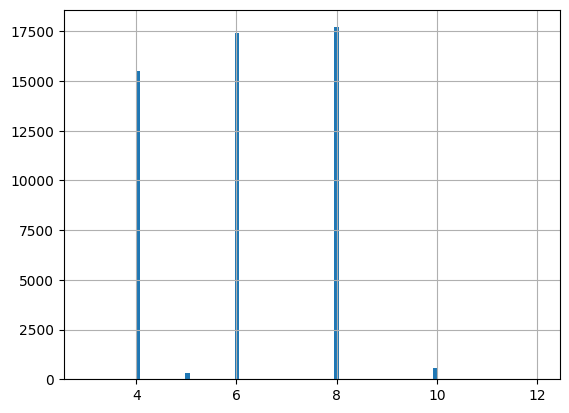

In [29]:
distribution_IQR('cylinders')

Histogram of: condition


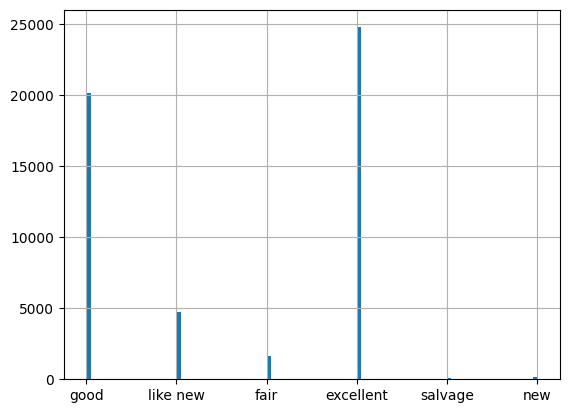

In [30]:
distribution_IQR('condition')

## Study and treat outliers


#### Finding outliers

A value is considered to be an outlier if it does not belong to the interval: [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

In [31]:
def find_outliers(column):
    print('Outliers of {}:'.format(column))
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    min_IQR = Q1 - 1.5*IQR
    max_IQR = Q3 + 1.5*IQR
    print("min border:", min_IQR, "max border:", max_IQR)


In [32]:
find_outliers('price')

Outliers of price:
min border: -12740.5 max border: 34567.5


In [33]:
find_outliers('vehicle_age')

Outliers of vehicle_age:
min border: -7.0 max border: 25.0


In [34]:
find_outliers('odometer')

Outliers of odometer:
min border: -44709.375 max border: 269631.625


In [35]:
# Store data without outliers in a separate DataFrame

cols = ['price','vehicle_age','odometer'] 

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data_without_outliers = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

data_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48502 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               48502 non-null  int64         
 1   model_year          48502 non-null  int64         
 2   model               48502 non-null  object        
 3   condition           48502 non-null  object        
 4   cylinders           48502 non-null  int64         
 5   fuel                48502 non-null  object        
 6   odometer            48502 non-null  int64         
 7   transmission        48502 non-null  object        
 8   type                48502 non-null  object        
 9   paint_color         48502 non-null  object        
 10  is_4wd              48502 non-null  int64         
 11  date_posted         48502 non-null  datetime64[ns]
 12  days_listed         48502 non-null  int64         
 13  day_posted          48502 non-null  int64     

## Study core parameters without outliers

In [36]:
def distribution_IQR2(column):
    print('Histogram of:{}'.format(column))
    data_without_outliers[column].hist()
    plt.show

Histogram of:price


count    48502.000000
mean     11210.773886
std       7821.631703
min          1.000000
25%       4999.000000
50%       8995.000000
75%      15990.000000
max      34555.000000
Name: price, dtype: float64

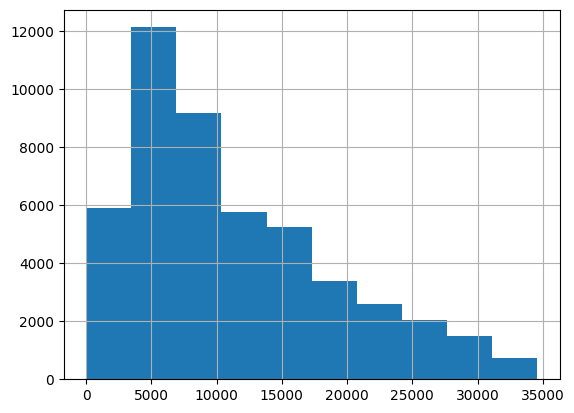

In [37]:
distribution_IQR2('price')
data_without_outliers['price'].describe()

The price histogram changed dramatically without the outliers. We can now conclude that price could be grouped into the following categories: 

- $0 - $3500
- $3500 - $7000, this will be the largest category
- $7000 - $10000
- $10000 - $14000
- $14000 - $21000
- $21000+


Histogram of:vehicle_age


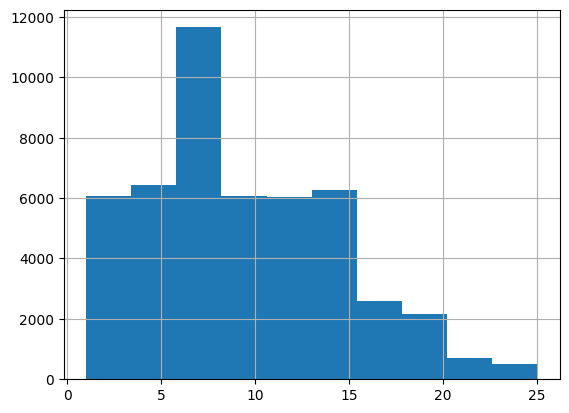

In [38]:
distribution_IQR2('vehicle_age')

Based on the distribution of the vehicle_age column, data could be separated in 5 categories for further analysis:
- 0 - 5 years old
- 5 - 7 years old
- 7 - 14 years old
- 14 - 18 years old
- 18+ years 

Histogram of:odometer


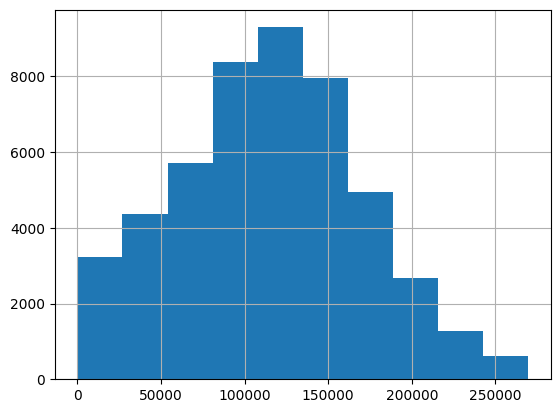

In [39]:
distribution_IQR2('odometer')

- Here there was major improvement from the previous graph, were the X axis numbers were not even displayed clearly. We can now see a more normal distribution and conclude that odometer could be separated into 3 categories:

- 0 - 80000 miles
- 80000 - 160000 miles
- 160000+ miles

Histogram of:cylinders


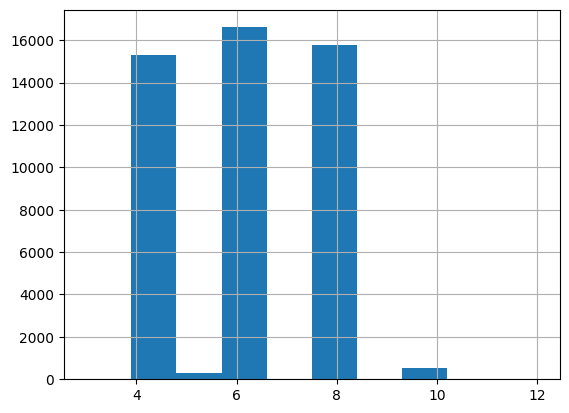

In [40]:
distribution_IQR2('cylinders')

- There weren't many changes in the cylinders distribution histogram when filtering out the outliers, meaning we didn't have outliers in this column

Histogram of:condition


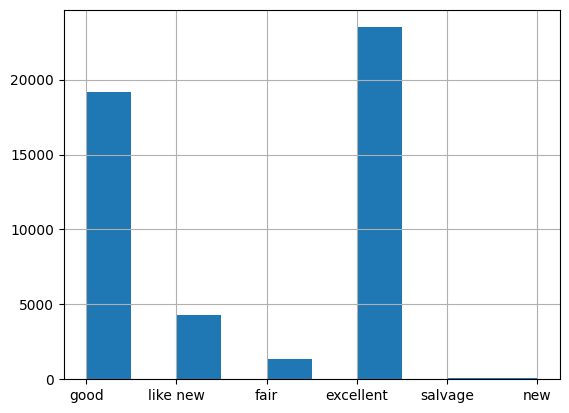

In [41]:
distribution_IQR2('condition')

- There weren't many changes in the condition distribution histogram when filtering out the outliers, meaning we didn't have outliers in this column

## Ads lifetime

In [42]:
print(data['days_listed'].describe())
print()
find_outliers('days_listed')
print()
data.groupby('condition')['days_listed'].agg(pd.Series.mode)

count    51518.000000
mean        39.555282
std         28.205713
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Outliers of days_listed:
min border: -32.0 max border: 104.0



condition
excellent    18
fair         21
good         17
like new     14
new          24
salvage      22
Name: days_listed, dtype: int64

- The mean of days listed is 39, the median is 33.
- It seems the most common amount of days listed per condition of cars is within the range of 14 - 24, and anything below this may be abnormally low.
- Judging by the outliers, ads listed for over 104 days were listed for an abnormally long time.
- 'like new' cars seem to be the ones that sell the fastest, followed by 'good' and 'excellent'.
- 'fair', 'salvage' and 'new' cars are the ones that take the most time to sell.

## Average price per each type of vehicle

-0.0011181668862762075
AxesSubplot(0.125,0.11;0.775x0.77)


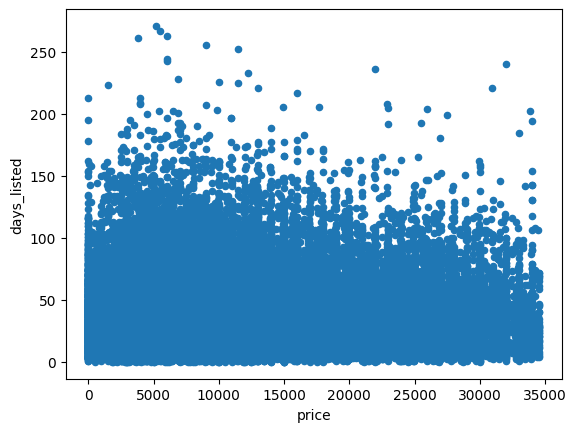

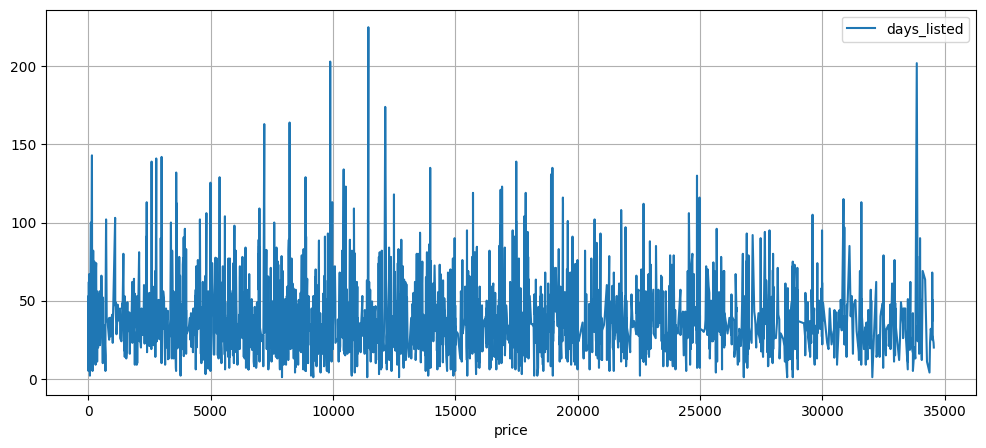

In [43]:
data_without_outliers.plot(x='price', y='days_listed', kind='scatter') 
print(data_without_outliers['price'].corr(data_without_outliers['days_listed']))
print(data_without_outliers.pivot_table(index='price', values='days_listed', aggfunc='median').plot(grid=True, figsize=(12,5)))

- Judging by the correlation index, there is almost no dependancy between days_listed and price of cars

In [44]:
data_without_outliers.groupby('type')['price'].agg(['count','mean']).sort_values(by='count', ascending=False)

,count,mean
type,,
sedan,12032,6971.647108
SUV,11932,10427.645323
truck,11140,15109.471364
pickup,6330,15002.581043
coupe,2033,13461.241515
wagon,1506,8975.517928
mini-van,1145,8051.448908
hatchback,1007,6838.923535
van,582,8846.596220


<AxesSubplot: xlabel='type'>

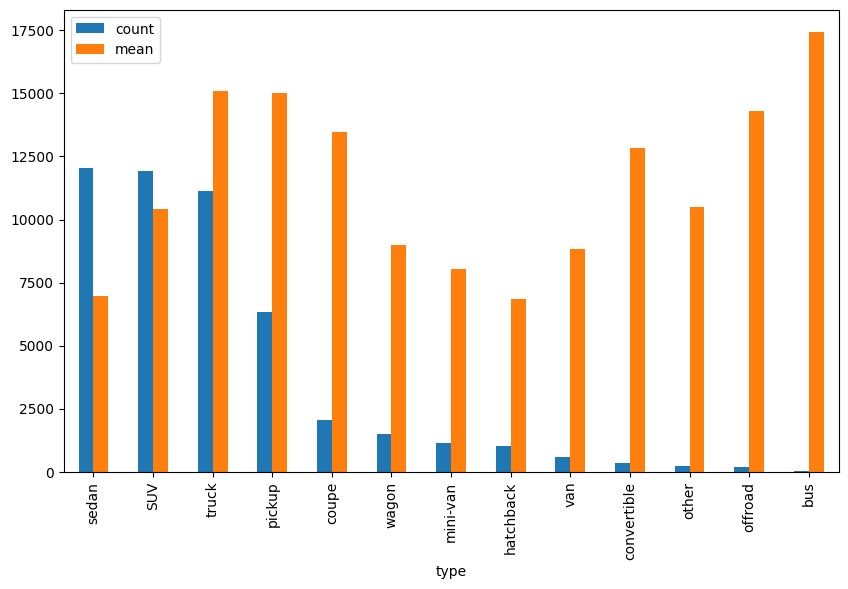

In [45]:
data_without_outliers.groupby('type')['price'].agg(['count','mean']).sort_values(by='count', ascending=False).plot(kind='bar', figsize=(10,6))



In the graph above, 'count' shows the number of ads for a certain type of car, and 'mean' shows the average price.
- sedan and SUV are the 2 types with the highest amount of ads, it makes sense since these are the most popular types of cars
- Seems that for cars with a smaller amount of ads, the price increases, in general


## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

In [46]:
# Replacing 'condition' categorical values with numerical for better analysis:

# new = 1
# like new = 2
# excellent = 3
# good = 4
# fair = 5
# salvage = 6

pd.options.mode.chained_assignment = None 
data_without_outliers['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'],[1,2,3,4,5,6], inplace=True)
print(data_without_outliers.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          4          6  gas    145000   
1  25500        2011      ford f-150          4          6  gas     88705   
2   5500        2013  hyundai sonata          2          4  gas    110000   
3   1500        2003      ford f-150          5          8  gas    193850   
4  14900        2017    chrysler 200          3          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup     unknown       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

   day_posted  month_posted  year_posted  vehicle_age  avg_yearly_mileage  
0          23             6       

In [47]:
#Correlation matrix for numerical variables

data_for_correlation = data_without_outliers[['price', 'vehicle_age', 'odometer', 'condition', 'type']]

#Creating 2 datasets for each of the most popular car types 
data_for_correlation_sedan = data_for_correlation.query('type == "sedan"')
data_for_correlation_SUV = data_for_correlation.query('type == "SUV"')                          

#Replacing 'sedan' and 'SUV' with numerical variables
data_for_correlation_sedan['type'].replace(['sedan'],[1], inplace=True)
data_for_correlation_SUV['type'].replace(['SUV'],[2], inplace=True)

#Converting data to numeric
data_for_correlation_sedan['type'] = data_for_correlation_sedan['type'].astype('int')
data_for_correlation_SUV['type'] = data_for_correlation_SUV['type'].astype('int')


In [48]:
print(data_for_correlation_sedan.corr()) 
print()
print(data_for_correlation_SUV.corr()) 

                price  vehicle_age  odometer  condition  type
price        1.000000    -0.615145 -0.564036  -0.293365   NaN
vehicle_age -0.615145     1.000000  0.619812   0.295000   NaN
odometer    -0.564036     0.619812  1.000000   0.342914   NaN
condition   -0.293365     0.295000  0.342914   1.000000   NaN
type              NaN          NaN       NaN        NaN   NaN

                price  vehicle_age  odometer  condition  type
price        1.000000    -0.575997 -0.524220  -0.263485   NaN
vehicle_age -0.575997     1.000000  0.626654   0.310385   NaN
odometer    -0.524220     0.626654  1.000000   0.342696   NaN
condition   -0.263485     0.310385  0.342696   1.000000   NaN
type              NaN          NaN       NaN        NaN   NaN


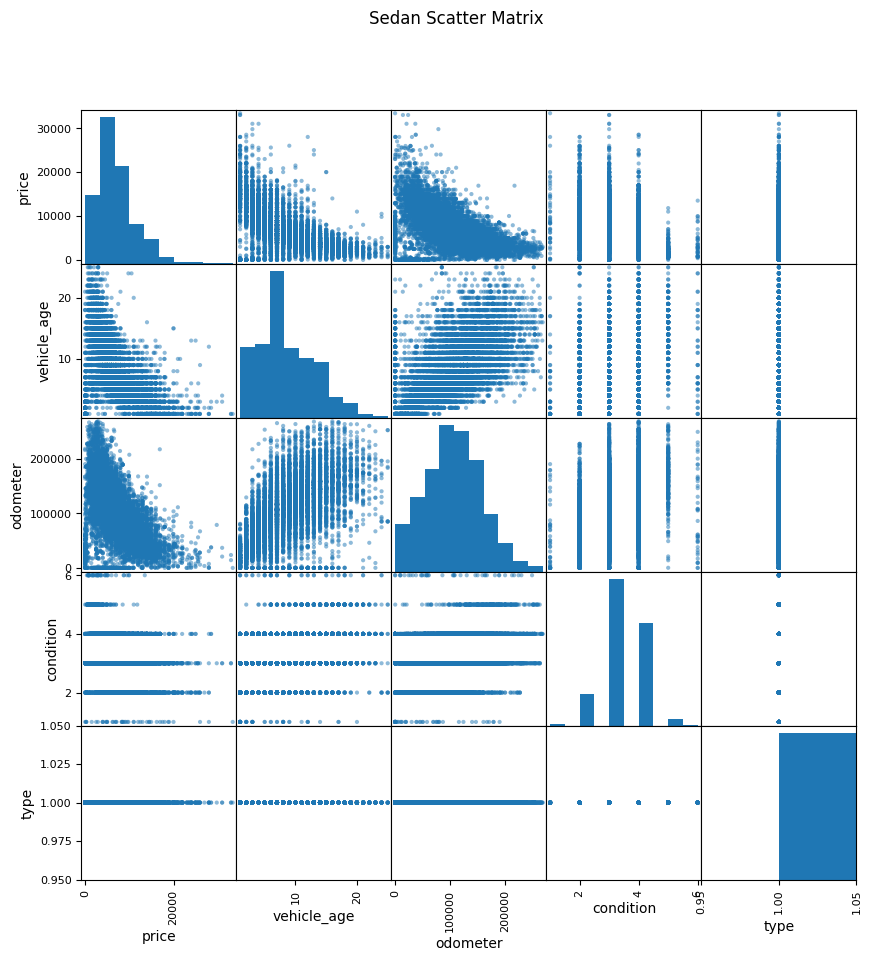

In [50]:
ax = pd.plotting.scatter_matrix(data_for_correlation_sedan, figsize=(10,10))
plt.suptitle('Sedan Scatter Matrix')
plt.show()

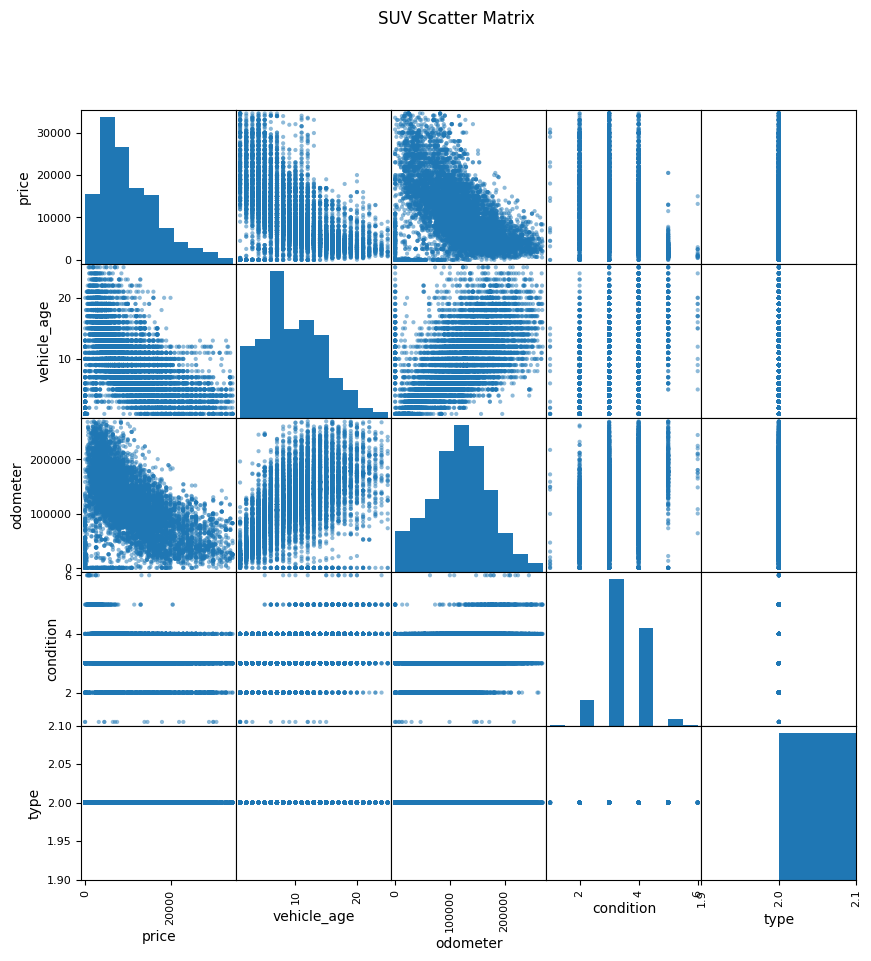

In [51]:
pd.plotting.scatter_matrix(data_for_correlation_SUV, figsize=(10,10))
plt.suptitle('SUV Scatter Matrix')
plt.show()

### Numerical variables - scatterplots conclusions

- All numerical variables vehicle_age, odometer and condition are negatively correlated with price, vehicle_age has the strongest effect on price from all variables
- As vehicle age increases, price decreases (and viceversa). This has the greatest efffect on price from all the compared variables.
- As mileage increaes, price decreases (and viceversa)
- Condition was replaced with numbers, 1 for newer and best condition and 6 for older and worse condition:
    - As cars are newer or in a better condition (closer to a smaller number) the price increases, and the older the car or the worse its condition (closer to bigger numbers), the lower the price.

In [52]:
def scatterplot(column): 
    data_for_correlation_sedan.plot(x=(column), y='price', kind='scatter', title='sedan', alpha=0.03)  
    plt.show
    print()
    data_for_correlation_SUV.plot(x=(column), y='price', kind='scatter', title='SUV', alpha=0.03) 
    plt.show  

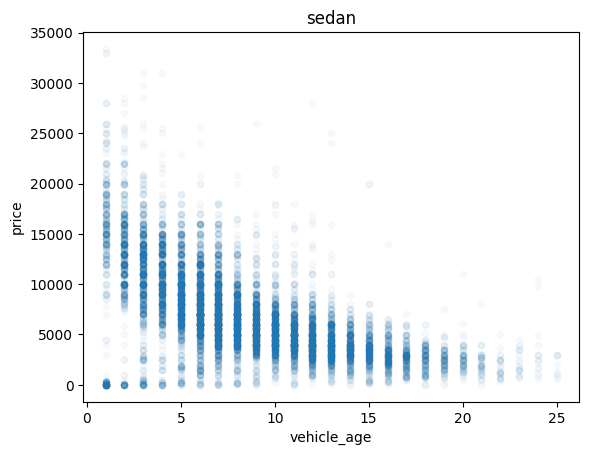

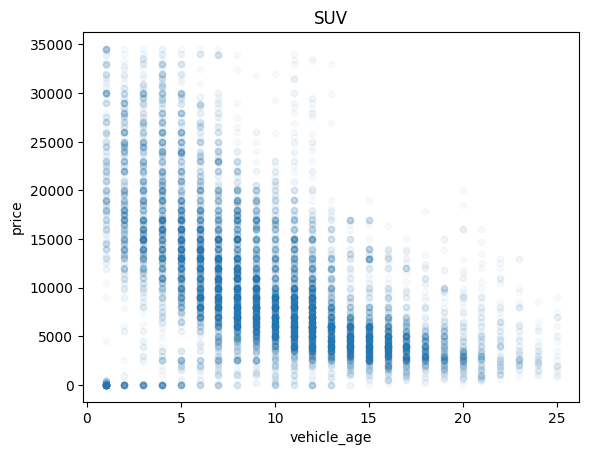

In [53]:
scatterplot('vehicle_age')

- Prices seem to be higher for SUV's, both for newer and older cars

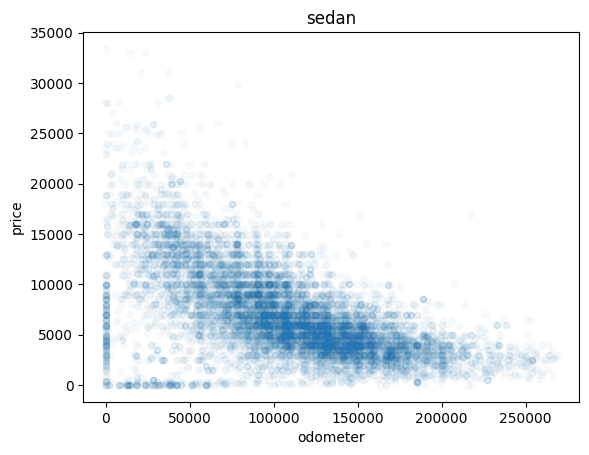

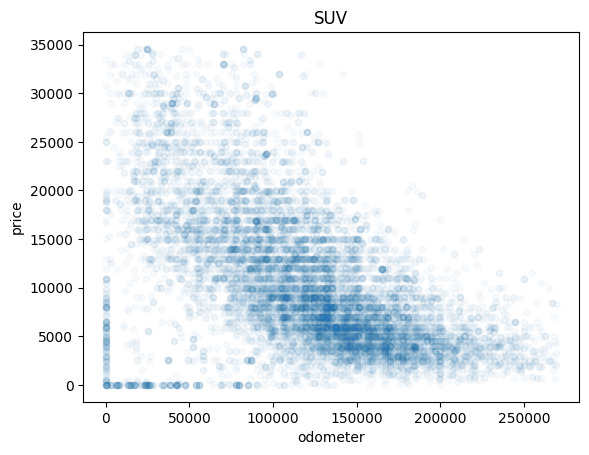

In [54]:
scatterplot('odometer')

- Prices for cars with more mileage seem to be higher for SUV's than for sedans.

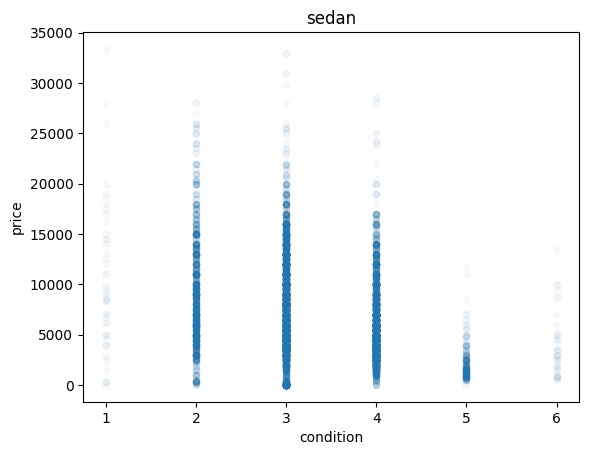

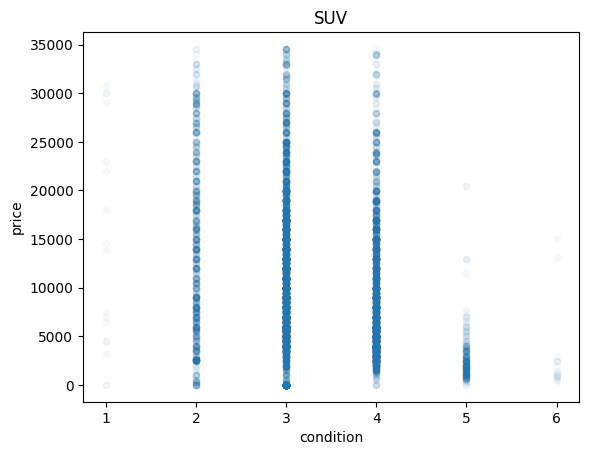

In [55]:
scatterplot('condition')

- As with the other variables, prices of cars amongst all conditions are higher for SUV's. The difference can be seen especially amongst 'like new' and 'excellent' cars, cars with the same condition tend to be quite more expensive.

In [56]:
# Checking categorical values with at least 50 ads
print(data_without_outliers['paint_color'].value_counts())
print()

# Removing data with less than 50 ads for analysis
data_for_categorical_boxplot_sedan = data_without_outliers[~((data_without_outliers['paint_color'] == 'purple')|(data_without_outliers['type'] != 'sedan'))]
data_for_categorical_boxplot_SUV = data_without_outliers[~((data_without_outliers['paint_color'] == 'purple')|(data_without_outliers['type'] != 'SUV'))]


white      9262
unknown    8731
black      7201
silver     6044
grey       4819
blue       4249
red        4110
green      1315
brown      1140
custom     1101
yellow      227
orange      213
purple       90
Name: paint_color, dtype: int64



<AxesSubplot: xlabel='paint_color', ylabel='price'>

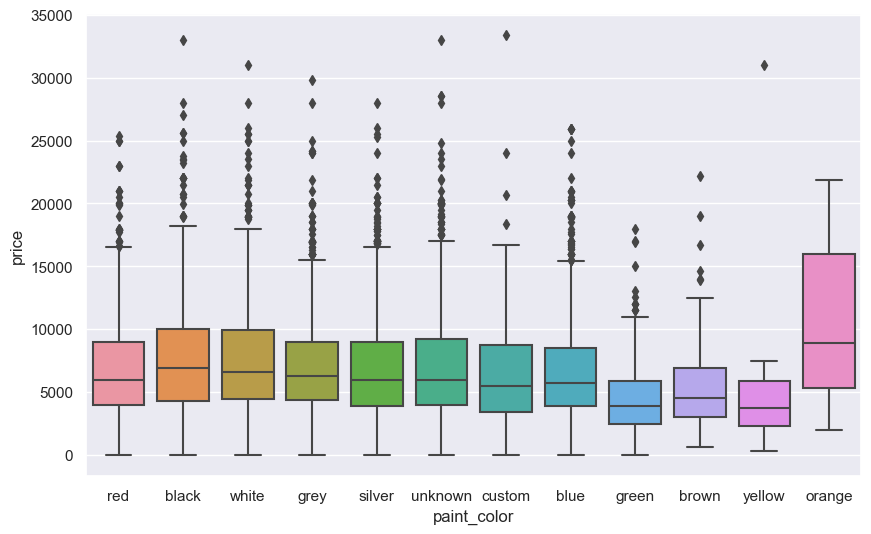

In [57]:
# checking the impact of paint color on price of sedan

sb.set(rc={'figure.figsize':(10,6)})
sb.boxplot(x='paint_color',y='price',data=data_for_categorical_boxplot_sedan)

#### Conclusions on the influcence of paint color over sedan cars:

- The price of red, black, white, grey, silver, unknown, custom and blue cars seem generally uniform. 
- The lowest prices are seen amonst green, brown and yellow.
- The highest prices are seen amogst orange sedans.

<AxesSubplot: xlabel='paint_color', ylabel='price'>

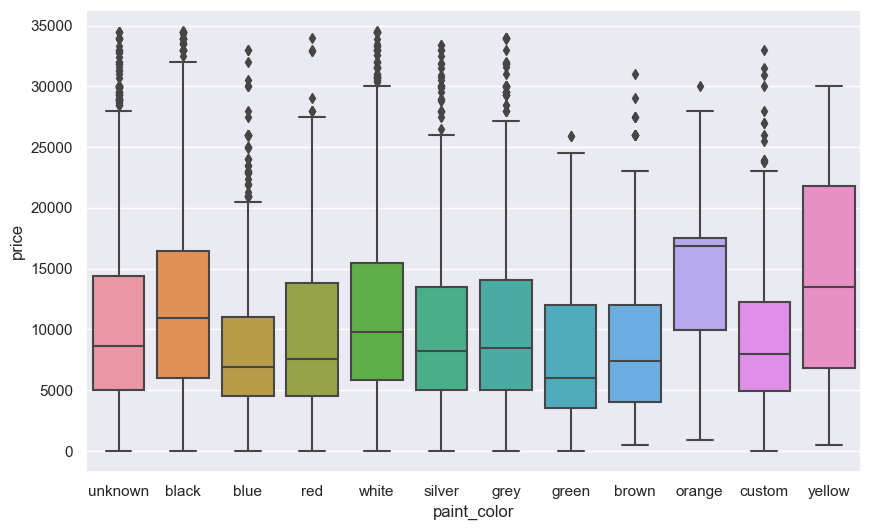

In [58]:
# checking the impact of paint color on price of SUV

sb.set(rc={'figure.figsize':(10,6)})
sb.boxplot(x='paint_color',y='price',data=data_for_categorical_boxplot_SUV)

#### Conclusions on the influcence of paint color over SUV cars:

- Here there price general uniformity amongst unknown, red, silver and grey SUV's.
- black and white SUV's seem generally more expensive than the before mentioned colors.
- green and brown are the least expensive SUV's.
- orange and yellow are the most expensive ones.

<AxesSubplot: xlabel='transmission', ylabel='price'>

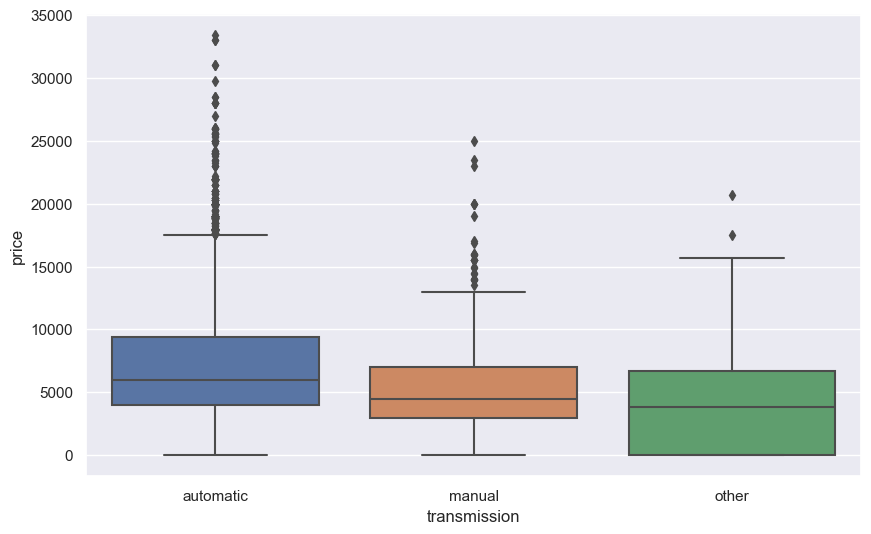

In [59]:
# checking the impact of transmission type on price of sedan

sb.boxplot(x='transmission',y='price',data=data_for_categorical_boxplot_sedan)

#### Conclusions on the influcence of transmission type over sedan cars:

- automatic cars are the most expensive ones, followed by manual and other

<AxesSubplot: xlabel='transmission', ylabel='price'>

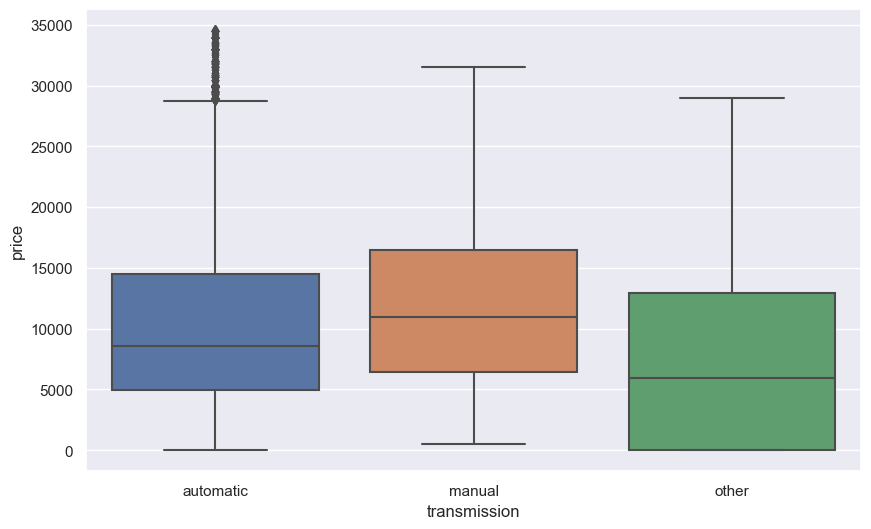

In [60]:
# checking the impact of transmission type on price of SUV
sb.boxplot(x='transmission',y='price',data=data_for_categorical_boxplot_SUV)

#### Conclusions on the influcence of transmission type over SUV cars:

- manual transmission cars are generallly the most expensive, but there are a few automatic SUV's with higher prices than manual ones

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

#### Conclusions about the analysis made


#####  Missing values were filled:
- in paint color, with 'unknown'
- in is_4wd with 0's
- in odometer, with medians of odometer based on condition and model year, calculated from the data without missing values
- in model year, with medians based on car model, calculated from the set of data without missing values
- in cylinders, with medians based on model, calculated from the set of data without missing values

##### Possible solutions for missing values: 
 - automatize is_4wd field to have default as 0
 - make rest of fields obligatory to fill

#### What affects cars' prices:

- sedan and SUV cars are the most popular types of cars, so I conducted a separate research for each of these types
- for both types of cars, vehicle age is the strongest definant of price from all the numerical variables, followed by odometer and car condition

#### Sedan cars conclusions
- automatic cars are the most expensive ones, followed by manual and other
- manual transmission cars are generallly the most expensive, but there are a few automatic cars with higher prices than manual ones
- The price of red, black, white, grey, silver, unknown, custom and blue cars seem generally uniform. 
- The lowest prices are seen amonst green, brown and yellow.
- The highest prices are seen amogst orange sedans.
 

#### SUV cars conclusions
- manual transmission cars are generallly the most expensive, but there are a few automatic cars with higher prices than manual ones
- There's a general price uniformity amongst unknown color, red, silver and grey SUV's.
- black and white SUV's seem generally more expensive than the before mentioned colors.
- green and brown are the least expensive SUV's.
- orange and yellow are the most expensive ones.